<a href="https://colab.research.google.com/github/SandrineLpx/work_cases/blob/main/510B_Case4_Fulton_Fish_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSIS 510B - Sandrine LEPESQUEUX
# Case 4 - Fulton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
!{sys.executable} -m pip install linearmodels

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SandrineLpx/work_cases/refs/heads/main/fulton-1.csv')

In [3]:
df.head(10)

,Mon,Tue,Wed,Thu,Date,Stormy,p,q
0,1,0,0,0,1,1,1.569217,8.994421
1,0,1,0,0,2,1,2.000000,7.707063
2,0,0,1,0,3,0,2.072321,8.350194
3,0,0,0,1,4,1,2.247139,8.656955
4,0,0,0,0,5,1,2.664327,7.844241
5,1,0,0,0,6,0,1.793486,9.301277
6,0,1,0,0,7,0,1.884168,8.920656
7,0,0,1,0,8,0,1.740133,9.105979
8,0,0,0,1,9,0,1.882875,8.307706
9,0,0,0,0,10,0,1.657924,9.209540


In [4]:
# Dipslay data type
df.dtypes

,0
Mon,int64
Tue,int64
Wed,int64
Thu,int64
Date,int64
Stormy,int64
p,float64
q,float64


# Question 1: Data exploration and descriptive statistics

## 1.a)

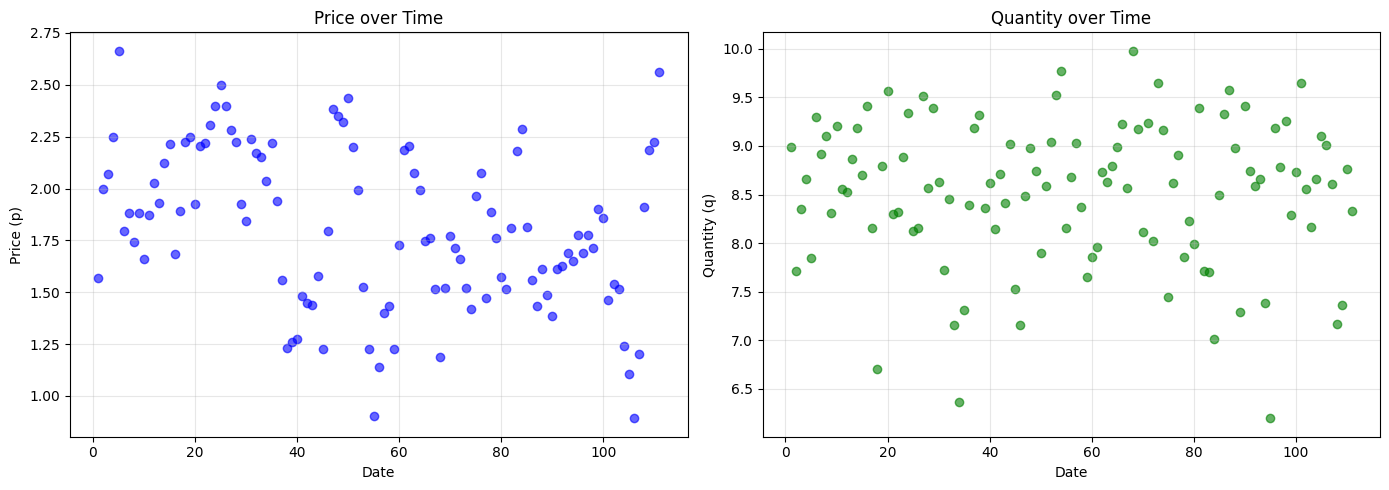

Price variation statistics:
Mean: 1.806
Std Dev: 0.382
Range: 1.772
Min: 0.892
Max: 2.664


In [5]:
# Question 1a: Scatterplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(df['Date'], df['p'], alpha=0.6, color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (p)')
ax1.set_title('Price over Time')
ax1.grid(True, alpha=0.3)

ax2.scatter(df['Date'], df['q'], alpha=0.6, color='green')
ax2.set_xlabel('Date')
ax2.set_ylabel('Quantity (q)')
ax2.set_title('Quantity over Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Price variation statistics
print("Price variation statistics:")
print(f"Mean: {df['p'].mean():.3f}")
print(f"Std Dev: {df['p'].std():.3f}")
print(f"Range: {df['p'].max() - df['p'].min():.3f}")
print(f"Min: {df['p'].min():.3f}")
print(f"Max: {df['p'].max():.3f}")

a) Based on scatterplots we can see that the variation of prices is pretty high. From below 1 to above 2.50. Looking at calculated min and max, prices are with a range of 1.772 (from 0.892 to 2.664). This indicates that fish prices are not stable and vary significantly from day to day.

## 1.b)

In [6]:
# Question 1b: Average price and quantity by weekday
print("Average Price and Quantity by Weekday:")

days = ['Mon', 'Tue', 'Wed', 'Thu']
for day in days:
    day_data = df[df[day] == 1]
    avg_price = day_data['p'].mean()
    avg_quantity = day_data['q'].mean()
    count = len(day_data)
    print(f"{day}: Avg Price = {avg_price:.3f}, Avg Quantity = {avg_quantity:.3f}, Count = {count}")


Average Price and Quantity by Weekday:
Mon: Avg Price = 1.747, Avg Quantity = 8.763, Count = 21
Tue: Avg Price = 1.793, Avg Quantity = 8.207, Count = 23
Wed: Avg Price = 1.799, Avg Quantity = 8.165, Count = 21
Thu: Avg Price = 1.868, Avg Quantity = 8.763, Count = 23


b) The average price and quantity of fish sold on each weekday is:

* Mon: Avg Price = 1.747, Avg Quantity = 8.763
* Tue: Avg Price = 1.793, Avg Quantity = 8.207
* Wed: Avg Price = 1.799, Avg Quantity = 8.165
* Thu: Avg Price = 1.868, Avg Quantity = 8.763

The day fish are sold with the highest prices is Thursdays with 1.868 average price. Probably because there is fewer quantity

Fish markets typically restock with fresh catches at the beginning of the week (Monday). As the week progresses, supply freshness decreases and available inventory may decline, which could explain why Monday has lower prices and Thursday has higher prices. Later in the week would mean lower supply before weekend restock. Also demand may be higher as buyers stock up before the weekend.

#Question 2. Linear Regression Model

In [7]:
# Question 2: Linear regression model
import statsmodels.formula.api as smf
model_A = smf.ols('q ~ Mon + Tue + Wed + Thu + p', data=df).fit()
print(model_A.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.940
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           7.08e-05
Time:                        06:09:46   Log-Likelihood:                -110.00
No. Observations:                 111   AIC:                             232.0
Df Residuals:                     105   BIC:                             248.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7320      0.336     28.936      0.0

**a) Linear Regression equation**

The linear regression equation produced by your model is:
q = 9.7320 +0.0143*Mon -0.5162*Tue -0.5554*Wed +0.0816*Thu -0.5625*p

**b) Quality of the model**

R^2 value = 0.220, which means that the model explains 22% of the variation in quantity sold. So 78% of the variation in quantity remains unexplained by these variables.

The independent variables that are significant are p(price) with a p value of 0.001 then Wednesday (0.007) then Tuesday (0.010). Monday and Thursday are non-significant variables with p value being over 0.05.

**c) Coefficient of Price**

The coefficient of price (p) is -0.5625 and we cannot use it to estimate the causual effect of price changes on quantity. The problem is that price and quantity are determined together in the market, they influence each other simultaneously. This means the -0.5625 coefficient mix together multiple effects such as the demand and the supply so we cannot isolate the true causual effect of "if I change price, how much will quantity change?" from this regression alone

# Question 3: Causual Effect of Price

## 3.a)

In [8]:
# Question 3a: Explore the instrumental variable

# Check correlation between Stormy and price
print(f"\nCorrelation between Stormy and p: {df['Stormy'].corr(df['p']):.4f}")

# Average price by stormy condition
print("\nAverage price by weather condition (2 days ago):")
stormy_prices = df.groupby('Stormy')['p'].agg(['mean', 'std', 'count'])
stormy_prices.index = ['Not Stormy (0)', 'Stormy (1)']
print(stormy_prices)

# Check correlation between Stormy and quantity
print(f"\nCorrelation between Stormy and q: {df['Stormy'].corr(df['q']):.4f}")

# Average quantity by stormy condition
print("\nAverage quantity by weather condition (2 days ago):")
stormy_quantity = df.groupby('Stormy')['q'].agg(['mean', 'std', 'count'])
stormy_quantity.index = ['Not Stormy (0)', 'Stormy (1)']
print(stormy_quantity)




Correlation between Stormy and p: 0.3994

Average price by weather condition (2 days ago):
                    mean       std  count
Not Stormy (0)  1.709667  0.350636     79
Stormy (1)      2.044929  0.354532     32

Correlation between Stormy and q: -0.2226

Average quantity by weather condition (2 days ago):
                    mean       std  count
Not Stormy (0)  8.628047  0.730874     79
Stormy (1)      8.265156  0.714900     32


In this dataset, the variable "Stormy" is set to 1 if it was stormy two days before the transaction date, and 0 otherwise. This 2-day lag is used because **stormy weather affects the supply of fresh fish**. If it was stormy two days ago, fishing boats caught less, reducing the supply arriving at the Fulton Fish Market today. Lower supply causes higher prices. The data confirms this: prices average \$2.05 on days following storms versus $1.71 on other days (correlation = 0.40).

**This variable is a good instrumental variable because the weather from two days ago affects the quantity caught (supply side), thereby influencing price, but does not directly affect how much fish buyers want to purchase today (demand side)**.


 In summary, stormy weather creates a change in price that comes only from the supply side, allowing us to isolate the true causal effect of price on quantity demanded, solving the endogeneity problem from Question 2.

## 3.b)

In [9]:
# 2b
# Code to examine potential direct correlation between Stormy and quantity

# Correlation we already have
print(f"Correlation between Stormy and q: {df['Stormy'].corr(df['q']):.4f}")

# Look at day-of-week patterns
print("\nProportion of stormy days by weekday:")
for day in ['Mon', 'Tue', 'Wed', 'Thu']:
    day_data = df[df[day] == 1]
    stormy_prop = day_data['Stormy'].mean()
    print(f"{day}: {stormy_prop:.2%} stormy")

# Check if stormy days cluster on certain days
print("\nDay distribution when Stormy=1:")
stormy_days = df[df['Stormy'] == 1][['Mon', 'Tue', 'Wed', 'Thu']].sum()
print(stormy_days)

print("\nDay distribution when Stormy=0:")
not_stormy_days = df[df['Stormy'] == 0][['Mon', 'Tue', 'Wed', 'Thu']].sum()
print(not_stormy_days)

Correlation between Stormy and q: -0.2226

Proportion of stormy days by weekday:
Mon: 38.10% stormy
Tue: 30.43% stormy
Wed: 23.81% stormy
Thu: 26.09% stormy

Day distribution when Stormy=1:
Mon    8
Tue    7
Wed    5
Thu    6
dtype: int64

Day distribution when Stormy=0:
Mon    13
Tue    16
Wed    16
Thu    17
dtype: int64


Yes, there are ways stormy weather could directly affect quantity sold.

First, **stormy days are not evenly distributed across weekdays**. Mondays have more post-storm days (38%) than Wednesdays (24%). Since we already know that quantity varies by day of week, this creates a direct link between storms and quantity through the day-of-week effect.

Second, if **buyers anticipate** that storms lead to higher prices or lower quality fish, they **might change their purchasing behavior regardless of the actual price**. For example, they might decide to buy less or skip shopping entirely after storms. The negative correlation between Stormy and quantity (-0.22) suggests there may be some direct effect beyond just the price mechanism.


## 3.c)

In [10]:

# Question 3c: IV Regression using IV2SLS
from linearmodels.iv import IV2SLS

# Run IV regression with explicit constant
iv_model = IV2SLS.from_formula('q ~ 1 + Mon + Tue + Wed + Thu + [p ~ Stormy]', data=df).fit() # 1 + to explicitly include the intercept, or the way the day variables are set up (as dummy variables) might be causing the intercept to be absorbed.

print("IV Regression Results (2SLS) - with explicit constant")
print("="*80)
print(iv_model.summary)

IV Regression Results (2SLS) - with explicit constant
                          IV-2SLS Estimation Summary                          
Dep. Variable:                      q   R-squared:                      0.1391
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0981
No. Observations:                 111   F-statistic:                    24.946
Date:                Sun, Dec 07 2025   P-value (F-stat)                0.0001
Time:                        06:09:47   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      10.745     0.7860     13.671     0.0000      9.2043      12.28

## 3.d)


**d) The coefficient of price did move from -0.5625 in OLS to -1.1194 in IV regression. Both negative but the IV coefficient is more negative which is expected.

**Is this expected? Yes.**

In the OLS regression, the coefficient was biased toward zero due to endogeneity. The observed price-quantity relationship mixed together both supply and demand effects, which partially offset each other. When supply decreases (pushing prices up), quantity also falls, creating a positive correlation that counteracts the negative demand relationship.

The IV regression isolates the **demand effect** by using variation in price that comes only from supply-side shocks (stormy weather). This removes the simultaneity bias and reveals the true causal effect of price on quantity demanded. The larger magnitude (-1.1194 vs -0.5625) shows that consumers are more price-sensitive than the OLS estimate suggested. When we properly account for endogeneity, we see that a price increase leads to a greater reduction in quantity demanded than the biased OLS estimate indicated.

## 3.e)
**e) updated linear regression equation**

q = 10.745 - 0.0254×Mon - 0.5308×Tue - 0.5664×Wed + 0.1093×Thu - 1.1194×p

# Question 4: Optimal fish price for each day of the week


## 4.a)

In [11]:
# Question 4a: Calculate optimal fish price for Monday

# IV regression equation from 3e:
# q = 10.745 - 0.0254*Mon - 0.5308*Tue - 0.5664*Wed + 0.1093*Thu - 1.1194*p

# Set values for Monday
Mon = 1
Tue = 0
Wed = 0
Thu = 0
p = 0.1

# Calculate quantity using IV regression equation
q_monday = 10.745 - 0.0254*Mon - 0.5308*Tue - 0.5664*Wed + 0.1093*Thu - 1.1194*p

# Calculate revenue (Revenue = Price × Quantity)
# Note: p is log[prices] + 2, so actual price = exp(p - 2)
actual_price = np.exp(p - 2)
revenue = actual_price * q_monday

print(f"Actual price (exp(p-2)): {actual_price:.4f}")
print(f"Revenue (Price × Quantity): {revenue:.4f}")

Actual price (exp(p-2)): 0.1496
Revenue (Price × Quantity): 1.5866


When price (p) is set to 0.1 on Monday, the predicted quantity is 10.608 units. The actual price is exp(0.1-2) = 0.1496, resulting in a revenue of 1.5866.

## 4.b)

In [12]:
# Question 4b: Calculate revenue for range of prices on Monday

# Create array of prices from 0 to 6 with increment 0.01
prices = np.arange(0, 6.01, 0.01)

# Set day variables for Monday
Mon = 1
Tue = 0
Wed = 0
Thu = 0

# Calculate quantity for each price using IV regression equation
# q = 10.745 - 0.0254*Mon - 0.5308*Tue - 0.5664*Wed + 0.1093*Thu - 1.1194*p
quantities = 10.745 - 0.0254*Mon - 0.5308*Tue - 0.5664*Wed + 0.1093*Thu - 1.1194*prices

# Calculate actual prices (exp(p-2))
actual_prices = np.exp(prices - 2)

# Calculate revenue for each price point
revenues = actual_prices * quantities

print(f"Number of price points: {len(prices)}")
print(f"Price range (p): {prices.min():.2f} to {prices.max():.2f}")
print(f"\nSample results:")
print(f"{'p':<10} {'Actual Price':<15} {'Quantity':<15} {'Revenue':<15}")
print("-"*60)

for i in range(0, len(prices), 100):  # Show every 100th value
    print(f"{prices[i]:<10.2f} {actual_prices[i]:<15.4f} {quantities[i]:<15.4f} {revenues[i]:<15.4f}")

Number of price points: 601
Price range (p): 0.00 to 6.00

Sample results:
p          Actual Price    Quantity        Revenue        
------------------------------------------------------------
0.00       0.1353          10.7196         1.4507         
1.00       0.3679          9.6002          3.5317         
2.00       1.0000          8.4808          8.4808         
3.00       2.7183          7.3614          20.0104        
4.00       7.3891          6.2420          46.1225        
5.00       20.0855         5.1226          102.8902       
6.00       54.5982         4.0032          218.5673       


Testing prices from 0 to 6 with 0.01 increments creates 601 different price points. The results show that as price increases, quantity decreases (following the demand relationship), but revenue initially increases because the price effect dominates, then continues to grow throughout the range tested.

| p    | Actual Price | Quantity | Revenue   |
|------|-------------:|---------:|----------:|
| 0.00 | 0.1353       | 10.7196  | 1.4507    |
| 1.00 | 0.3679       | 9.6002   | 3.5317    |
| 2.00 | 1.0000       | 8.4808   | 8.4808    |
| 3.00 | 2.7183       | 7.3614   | 20.0104   |
| 4.00 | 7.3891       | 6.2420   | 46.1225   |
| 5.00 | 20.0855      | 5.1226   | 102.8902  |
| 6.00 | 54.5982      | 4.0032   | 218.5673  |


## 4.c)

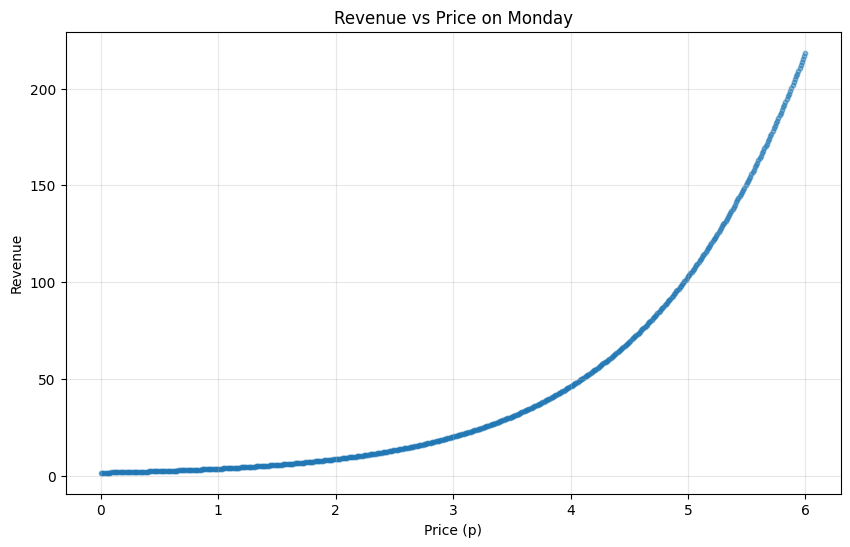

Optimal p value: 6.00
Optimal actual price (exp(p-2)): 54.5982
Predicted quantity at optimal price: 4.0032
Maximum revenue: 218.5673


In [13]:
# Question 4c: Plot revenue vs price and find optimal price for Monday

plt.figure(figsize=(10, 6))
plt.scatter(prices, revenues, alpha=0.5, s=10)
plt.xlabel('Price (p)')
plt.ylabel('Revenue')
plt.title('Revenue vs Price on Monday')
plt.grid(True, alpha=0.3)
plt.show()

# Find the optimal price (maximum revenue)
max_revenue_idx = np.argmax(revenues)
optimal_price = prices[max_revenue_idx]
max_revenue = revenues[max_revenue_idx]
optimal_quantity = quantities[max_revenue_idx]
optimal_actual_price = actual_prices[max_revenue_idx]

print(f"Optimal p value: {optimal_price:.2f}")
print(f"Optimal actual price (exp(p-2)): {optimal_actual_price:.4f}")
print(f"Predicted quantity at optimal price: {optimal_quantity:.4f}")
print(f"Maximum revenue: {max_revenue:.4f}")

Based on the plot, revenue continuously increases as price rises throughout the entire range tested. The maximum revenue of 218.57 occurs at the highest price tested (p = 6.00, actual price = 54.60).

However, this result seems unrealistic. The model predicts sellers should charge extremely high prices. This suggests the linear IV model may not be appropriate for pricing decisions at extreme values, or there may be practical constraints (like customer willingness to pay or competition) not captured in the model. A more realistic optimal price would likely be in the moderate range (p = 2-4) where the revenue curve shows strong growth but prices remain reasonable for a fish market.

## 4.d)

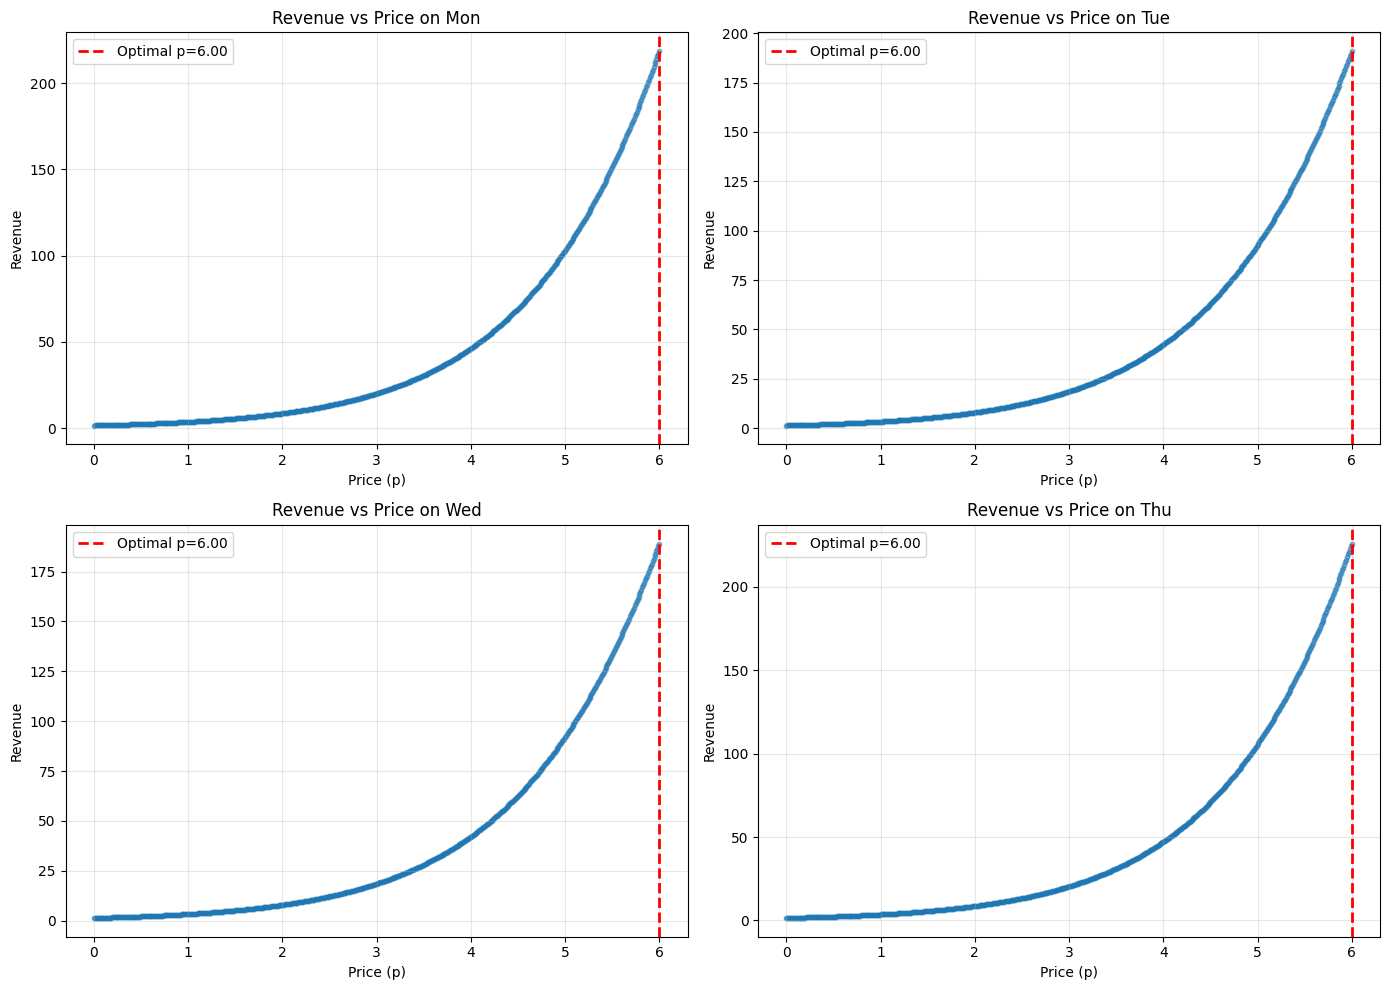


Optimal Price Summary for All Days:
Day        Optimal p       Actual Price    Quantity        Max Revenue    
--------------------------------------------------------------------------------
Mon        6.00            54.5982         4.0032          218.5673       
Tue        6.00            54.5982         3.4978          190.9734       
Wed        6.00            54.5982         3.4622          189.0297       
Thu        6.00            54.5982         4.1379          225.9217       


In [14]:
# Question 4d: Calculate optimal prices for Tuesday, Wednesday, and Thursday

# Create array of prices from 0 to 6 with increment 0.01
prices = np.arange(0, 6.01, 0.01)

# Create figure with subplots for all days
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

days = ['Mon', 'Tue', 'Wed', 'Thu']
day_settings = [
    {'Mon': 1, 'Tue': 0, 'Wed': 0, 'Thu': 0},
    {'Mon': 0, 'Tue': 1, 'Wed': 0, 'Thu': 0},
    {'Mon': 0, 'Tue': 0, 'Wed': 1, 'Thu': 0},
    {'Mon': 0, 'Tue': 0, 'Wed': 0, 'Thu': 1}
]

optimal_results = []

for idx, (day, settings) in enumerate(zip(days, day_settings)):
    # Calculate quantities using IV regression equation
    quantities = (10.745
                  - 0.0254*settings['Mon']
                  - 0.5308*settings['Tue']
                  - 0.5664*settings['Wed']
                  + 0.1093*settings['Thu']
                  - 1.1194*prices)

    # Calculate actual prices and revenues
    actual_prices = np.exp(prices - 2)
    revenues = actual_prices * quantities

    # Find optimal price
    max_revenue_idx = np.argmax(revenues)
    optimal_price = prices[max_revenue_idx]
    max_revenue = revenues[max_revenue_idx]
    optimal_quantity = quantities[max_revenue_idx]
    optimal_actual_price = actual_prices[max_revenue_idx]

    # Store results
    optimal_results.append({
        'Day': day,
        'Optimal_p': optimal_price,
        'Actual_Price': optimal_actual_price,
        'Quantity': optimal_quantity,
        'Revenue': max_revenue
    })

    # Plot
    axes[idx].scatter(prices, revenues, alpha=0.5, s=10)
    axes[idx].axvline(optimal_price, color='r', linestyle='--', linewidth=2, label=f'Optimal p={optimal_price:.2f}')
    axes[idx].set_xlabel('Price (p)')
    axes[idx].set_ylabel('Revenue')
    axes[idx].set_title(f'Revenue vs Price on {day}')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Print summary table
print("\nOptimal Price Summary for All Days:")
print("="*80)
print(f"{'Day':<10} {'Optimal p':<15} {'Actual Price':<15} {'Quantity':<15} {'Max Revenue':<15}")
print("-"*80)
for result in optimal_results:
    print(f"{result['Day']:<10} {result['Optimal_p']:<15.2f} {result['Actual_Price']:<15.4f} {result['Quantity']:<15.4f} {result['Revenue']:<15.4f}")

The analysis shows that across all weekdays (Tuesday, Wednesday, and Thursday), the optimal price remains at p = 6.00 (actual price = 54.60), the highest value in the tested range. Thursday generates the highest maximum revenue (225.92), followed by Monday (218.57), Tuesday (190.97), and Wednesday (189.03). The differences in revenue across days come from the varying baseline quantities - the day-of-week coefficients in the IV model show that Tuesday and Wednesday have lower baseline demand (negative coefficients of -0.53 and -0.57), while Thursday has slightly higher demand (positive coefficient of 0.11).

However, similar to the Monday analysis, these extremely high optimal prices are unrealistic for a fish market and suggest the linear model's limitations at extreme price values.

In practice, sellers would need to consider market constraints, competition, and customer price sensitivity that aren't fully captured in this model.

In [15]:
# Step 1: Install TeX Live, which is required for PDF output with nbconvert.
# This command will install a basic TeX distribution; it can take a few minutes.
# If you need more comprehensive LaTeX features, you might need a larger package.
!apt-get update && apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

# Step 2: Ensure your current notebook is saved and know its filename.
# For example, if your notebook is named 'fulton.ipynb', you would use that name.
# You can find the notebook name at the top of your Colab tab, or by going to File -> Save a copy in Drive/GitHub.

# Step 3: Convert the notebook to PDF using jupyter nbconvert.
# Replace 'your_notebook_name.ipynb' with the actual filename of your notebook.
# The PDF will be saved in the Colab environment (e.g., in /content/).
# You can then download it from the 'Files' tab on the left sidebar.
# !jupyter nbconvert --to pdf your_notebook_name.ipynb

# Example for this notebook, assuming it's saved as 'Fulton-1.ipynb':
# !jupyter nbconvert --to pdf "Fulton-1.ipynb"


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 https://cli.github.com/packages stable InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,201 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/u